In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
iris_df = pd.read_csv("iris (1).csv")  # Change the path if needed

# Prepare features and target
X = iris_df.drop("species", axis=1)
y = LabelEncoder().fit_transform(iris_df["species"])  # Convert species to numeric

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate SVM with Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("Linear Kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

# Train and evaluate SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("\nRBF Kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))


Linear Kernel:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

RBF Kernel:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Accuracy: 0.9305
Confusion Matrix:
 [[144   0   1   0   0   0   1   0   0   0   1   0   1   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0 143   0   5   0   1   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0 123   0   2   0   3   1   0   0   1   0   0   0   4   0   0   2
    0   0   1   0   0   0   0   0]
 [  0   1   0 153   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1   0 130   0   5   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   2   0   0   1 134   0   0   1   0   0   0   0   0   0   0   0   0
    1   1   0   0   0   0   0   0]
 [  1   0   1   4   0   0 149   0   0   0   2   0   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   4   0   8   0   0   0 106   0   0   5   0   0   1   2   1   1  13
    0   0   2   0   0   0   1   0]
 [  0   0   0   1   0   2   0   0 134   7   0   0   0   0   0   0   0   0
    0   0   0   0 

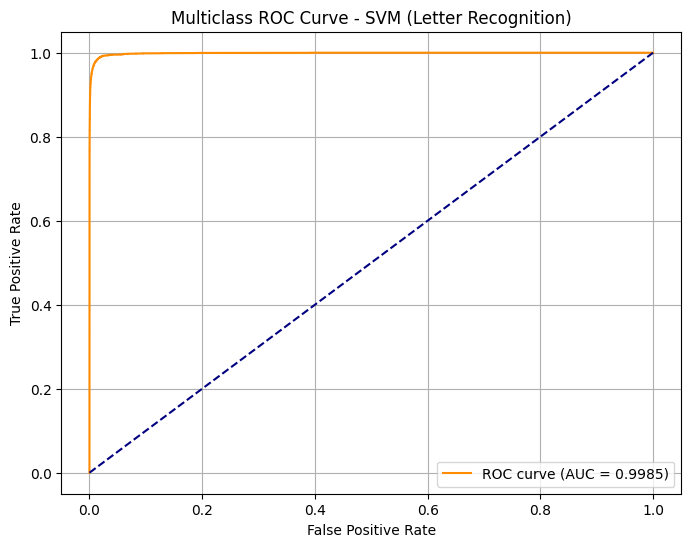

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("letter-recognition.csv")  # Change path if needed

# Split features and target
X = df.drop('letter', axis=1)
y = df['letter']

# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier with RBF kernel
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

# Binarize labels for ROC and AUC
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_proba.ravel())
auc_score = roc_auc_score(y_test_binarized, y_proba, average='macro', multi_class='ovr')

print("AUC Score:", auc_score)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve - SVM (Letter Recognition)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


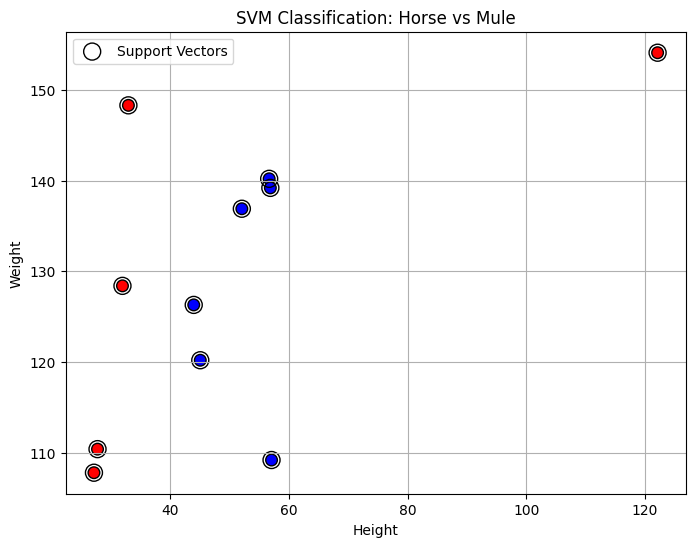

Accuracy: 0.9090909090909091
Support Vectors:
 [[ 44.  126.3]
 [ 52.1 136.9]
 [ 57.1 109.2]
 [ 45.1 120.2]
 [ 56.7 140.2]
 [ 56.9 139.2]
 [ 33.  148.3]
 [ 27.8 110.4]
 [ 27.2 107.8]
 [ 32.  128.4]
 [122.1 154.1]]


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

# Step 1: Create dataset
data = {
    "Height": [44.0, 52.1, 57.1, 33.0, 27.8, 27.2, 32.0, 45.1, 56.7, 56.9, 122.1],
    "Weight": [126.3, 136.9, 109.2, 148.3, 110.4, 107.8, 128.4, 120.2, 140.2, 139.2, 154.1],
    "Label":  ["Horse", "Horse", "Horse", "Mule", "Mule", "Mule", "Mule", "Horse", "Horse", "Horse", "Mule"]
}
df = pd.DataFrame(data)

# Step 2: Save CSV
df.to_csv("horses_mules_dataset.csv", index=False)

# Step 3: Load dataset
df = pd.read_csv("horses_mules_dataset.csv")

# Step 4: Preprocess data
X = df[["Height", "Weight"]].values
y = df["Label"].map({"Horse": 0, "Mule": 1}).values  # Convert to numeric

# Step 5: Train SVM model
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Step 6: Plot data and support vectors
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=70, edgecolors='k')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("SVM Classification: Horse vs Mule")

# Plot support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=150, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Accuracy
y_pred = model.predict(X)
acc = accuracy_score(y, y_pred)
print("Accuracy:", acc)

# Step 8: Support Vectors
print("Support Vectors:\n", model.support_vectors_)
